In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv("bottle.csv")
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [4]:
df.isnull().sum()


Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [5]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [6]:
# Getting the relation between Temperatue and depth
df1=df[["Depthm","T_degC"]]
df1.head()

,Depthm,T_degC
0,0,10.50
1,8,10.46
2,10,10.46
3,19,10.45
4,20,10.45


In [7]:
df1.Depthm.isnull().sum()


0

In [8]:
df1.T_degC.isnull().sum()

10963

In [9]:

df1["T_degC"].fillna(df1["T_degC"].mean(),inplace=True)
df1.T_degC.isnull().sum()

0

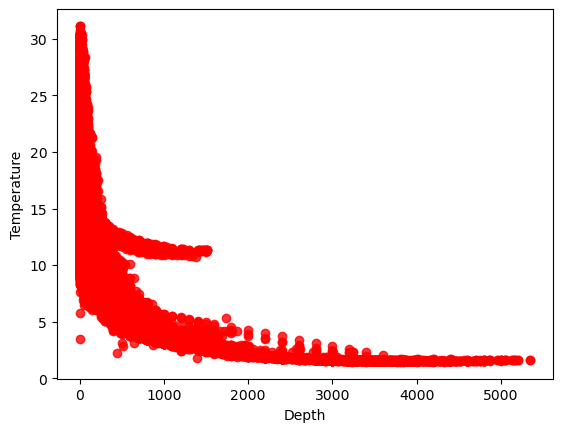

In [10]:
# Drawing a scatter plot between Temperature and Depth 
plt.scatter(x=df["Depthm"],y=df["T_degC"],alpha=0.8,color='r')
plt.ylabel("Temperature")
plt.xlabel("Depth")
plt.show()               
               

In [11]:
# Getting the relation between temperature and salinity of water
df2=df[['T_degC','Salnty']]
df2.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [12]:
df2.isnull().sum()

T_degC    10963
Salnty    47354
dtype: int64

In [13]:
df2.dropna(axis=0,inplace=True)

In [14]:
df2.shape

(814247, 2)

In [15]:
df2.describe()

,T_degC,Salnty
count,814247.000000,814247.000000
mean,10.860287,33.841337
std,4.224930,0.461636
min,1.440000,28.431000
25%,7.750000,33.489000
50%,10.110000,33.866000
75%,13.930000,34.197000
max,31.140000,37.034000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

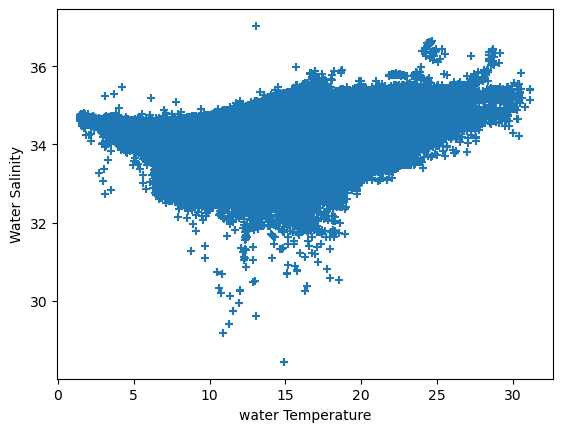

In [17]:
plt.scatter(x=df2["T_degC"],y=df2["Salnty"],marker="+")
plt.xlabel("water Temperature")
plt.ylabel("Water Salinity")
plt.show()               
               

In [18]:
# Now We will get the relationship between depth and prseeure

In [19]:
df3=df[['T_degC','Salnty']]
df3.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [20]:
X=df2["T_degC"]
y=df2["Salnty"]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10,shuffle=True)

In [22]:
regressor = LinearRegression()
regressor.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

LinearRegression()

In [23]:
m=regressor.coef_
m


array([[-0.05521248]])

In [24]:
n=regressor.intercept_
n

array([34.44056898])

In [25]:
y_pred = regressor.predict(np.array(X_test).reshape(-1,1))
r2_score(y_test, y_pred)

0.2550610237252302

In [26]:
x_input = np.linspace(0, 30, 500)
y_input = m * x_input + n
y_input = y_input.reshape(-1, 1)

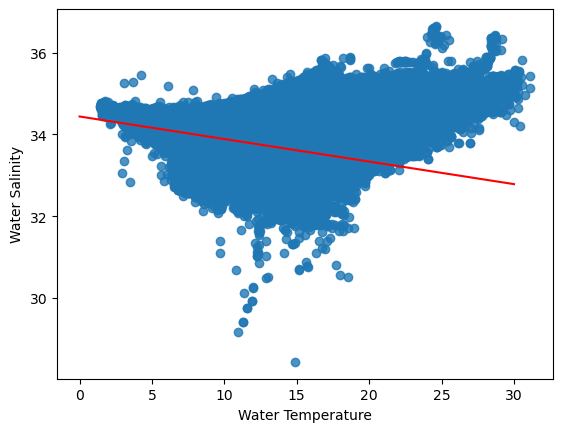

In [27]:
plt.scatter(x = X_train, y = y_train, alpha = 0.8)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Water Temperature')
plt.ylabel('Water Salinity')
plt.show()

In [28]:
# multiple linear regression
Z = df[['T_degC', 'Depthm']]
p = df['Salnty']


In [29]:
Z.fillna(0,inplace=True)
p.fillna(0,inplace=True)


In [30]:
Z_train, Z_test, p_train, p_test = train_test_split(Z, p, test_size=0.2, random_state=10)


In [31]:

mlr=LinearRegression()


In [32]:
mlr.fit(Z_train, p_train)

LinearRegression()

In [33]:
p_pred=mlr.predict(Z_test)
print("MSE",mean_squared_error(p_test,p_pred))
print("R2 score",r2_score(p_test,p_pred))

MSE 58.86160035775953
R2 score 0.016672905411646677


In [34]:
coefficient=mlr.coef_

In [35]:
intercept=mlr.intercept_

In [36]:
# xx, yy = np.meshgrid(Z, p)
# zz = intercept + coefficient[0] * xx + coefficients[1] * yy

# # Plot the regression plane
# ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis', label='Regression Plane')

# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.title('Multiple Linear Regression')
# plt.legend()
# plt.show()

In [37]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(Z,p, c='b', marker='o', label='Temperature & Depth vs Salanty')
# ax.scatter(Z,p ,c='r', marker='^', label='Temperature & Depth vs Salanty')

In [38]:
# import plotly.graph_objects as go
# fig=go.Figure()
# fig.add_trace(go.Box(x=df2["T_degC"],name="T_degC",boxpoints="outliers",))
# fig.add_trace(go.Box(x=df2["Salnty"],name="Salnty",boxpoints="outliers",))

# fig.update_layout(title_text="Box Plot for Temperature and Salinity with Outliers")
# fig.show()